In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../input/titanic/train.csv")
df_test = pd.read_csv("../input/titanic/test.csv")
df_submission = pd.read_csv("../input/titanic/gender_submission.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
def process_data(df):
    convert_vals = {'Sex': {'male':0,'female':1},
                    'Embarked':{'S':0,'C':1,'Q':2}}
    df_tmp = df.copy()
    df_tmp['Age'].fillna(value=df['Age'].mean(),inplace=True)
    df_tmp['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
    df_tmp['Fare'].fillna(df['Fare'].mean(),inplace=True)
    df_tmp = df_tmp.replace(convert_vals)
    df_tmp = df_tmp.drop(['Cabin','Name','Ticket'],axis=1)
    #df_tmp.set_index('PassengerId',drop=True)
    
    return df_tmp

In [5]:
def evaluate(model,X,y):
    disp = plot_confusion_matrix(model,X,y)
    disp.ax_.set_title("%s" %(model.__class__.__name__))
    
    print(classification_report(y,model.predict(X)))

In [6]:
df = process_data(df)

In [7]:
features = ['Pclass','Sex','SibSp','Parch']

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df['Survived']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [9]:
knn_scores = pd.DataFrame()
for k in range(2,20):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train,y_train)
    score = balanced_accuracy_score(y_test,KNN.predict(x_test))
    knn_scores = knn_scores.append({'k':k,'score':score},ignore_index=True)

In [10]:
knn_scores.sort_values(by='score',ascending=False)

,k,score
1,3.0,0.754286
12,14.0,0.746310
16,18.0,0.744286
17,19.0,0.743333
15,17.0,0.743333
2,4.0,0.743095
5,7.0,0.742381
11,13.0,0.741310
9,11.0,0.740357
13,15.0,0.739405


In [11]:
k = knn_scores.sort_values(by='score',ascending=False).head(1)['k'].values[0].astype(int)

In [12]:
KNN = KNeighborsClassifier(n_neighbors=k)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [14]:
SVM = SVC(kernel='linear')
SVM.fit(x_train,y_train)

SVC(kernel='linear')

In [15]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
#RFC = RandomForestClassifier()
RFC = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
RFC.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, random_state=2)

In [17]:
MLP = MLPClassifier(max_iter=1000)
MLP.fit(x_train,y_train)

MLPClassifier(max_iter=1000)

In [18]:
GBC = GaussianProcessClassifier()
GBC.fit(x_train,y_train)

GaussianProcessClassifier()

In [19]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

AdaBoostClassifier()

In [20]:
GNB = GaussianNB()
GNB.fit(x_train,y_train)

GaussianNB()

In [21]:
models = [KNN,LR,SVM,DT,RFC,MLP,GBC,ABC,GNB]

Model: KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       168
           1       0.83      0.58      0.68       100

    accuracy                           0.80       268
   macro avg       0.81      0.75      0.77       268
weighted avg       0.80      0.80      0.79       268

Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       168
           1       0.74      0.69      0.72       100

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268

Model: SVC
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       168
           1       0.72      0.71      0.71       100

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted 

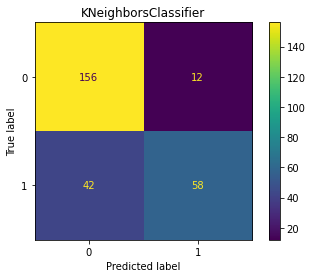

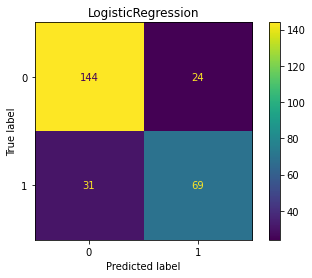

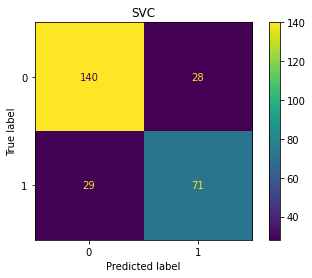

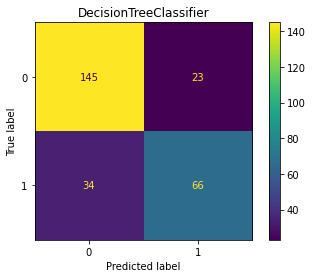

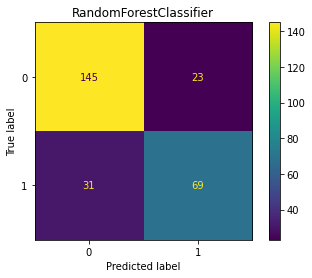

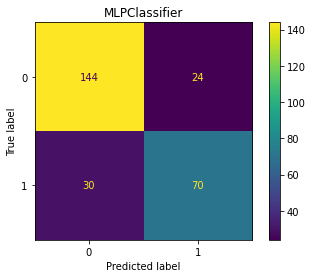

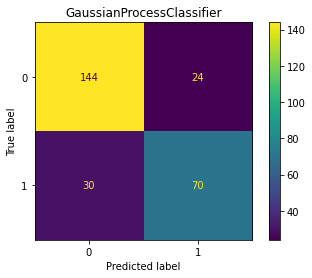

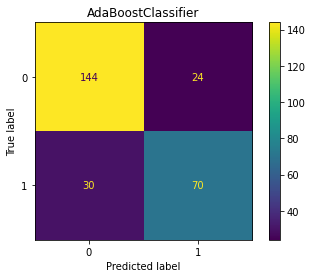

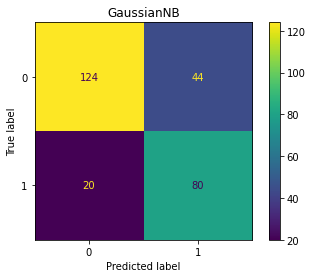

In [22]:
for model in models:
    print("Model: %s" %(model.__class__.__name__))
    evaluate(model,x_test,y_test)

In [23]:
df_test = process_data(df_test)

In [24]:
X_test = df_test[features]

X_test = scaler.fit_transform(X_test)
y_preds = RFC.predict(X_test)

In [25]:
df_submission['PassengerId'] = df_test['PassengerId']
df_submission['Survived'] = y_preds

In [26]:
df_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [27]:
y_preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [28]:
df_submission.to_csv("submission.csv",index=False)